<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment9/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 9s 0us/step


In [5]:
print(train_features[0].shape)
print(num_classes)

(32, 32, 3)
10


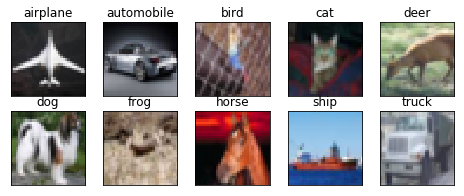

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
from keras.layers import GlobalMaxPooling2D
# Define the model
# RF 3
# input size 32
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 5
# input size 32
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 10
# input size 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 1, 1, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 12
# input size 16
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# RF 14
# input size 16
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 28
# input size 16
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 1, 1, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 30
# input size 8
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 32
# input size 8
model.add(Convolution2D(num_classes, 8, 8))
#model.add(Flatten())
model.add(GlobalMaxPooling2D())
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)       512       
__________

# Run the model with data augmentation WITHOUT cutout

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=100, verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
W0630 04:31:12.298910 140222139164544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/100
390/390 [==============================] - 33s 85ms/step - loss: 1.9660 - acc: 0.4399 - val_loss: 1.4665 - val_acc: 0.5178

Epoch 00001: val_acc improved from -inf to 0.51781, saving model to modelBest.h5
Epoch 2/100
390/390 [==============================] - 28s 72ms/step - loss: 1.5226 - acc: 0.5525 - val_loss: 1.5093 - val_acc: 0.5369

Epoch 00002: val_acc improved from 0.51781 to 0.53687, saving model to modelBest.h5
Epoch 3/100
390/390 [==============================] - 28s 71ms/step - loss: 1.4127 - acc: 0.5804 - val_loss: 1.1627 - val_acc: 0.6144

Epoch 00003: val_acc improved from 0.53687 to 0.61438, saving model to modelBest.h5
Epoch 4/100
390/390 [==============================] - 27s 70ms/step - loss: 1.0577 - acc: 0.6423 - val_loss: 1.0347 - val_acc: 0.6508

Epoch 00004: val_acc improved from 0.61438 to 0.65075, saving model to modelBest.h5
Epoch 5/100
390/390 [==============================] - 28s 71ms/step - loss: 0.8549 - acc: 0.7009 - val_loss: 0.8296 - val_

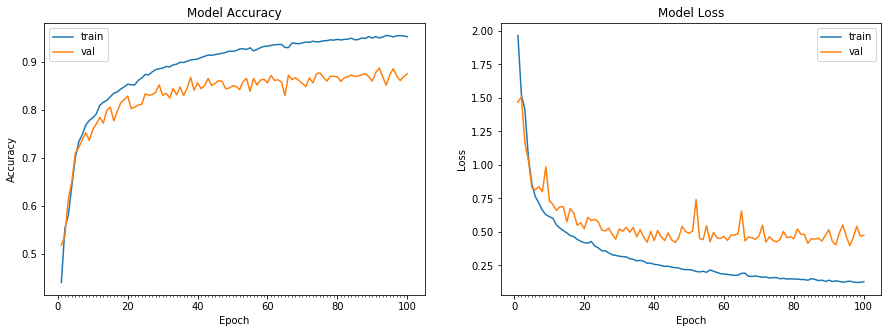

Accuracy on test data is: 36.03


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

checkpoint = ModelCheckpoint('modelBest.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

datagen = ImageDataGenerator(zoom_range=0.1, 
                             horizontal_flip=True,
                            featurewise_center=True,
                            featurewise_std_normalization=True)
datagen.fit(train_features)
testgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)
testgen.fit(test_features)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = testgen.flow(test_features, test_labels), validation_steps=100, verbose=1,
                                callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Find the trained model here https://github.com/Curiousss/EVA/blob/master/Assignment9/modelBest.h5

In [0]:
from google.colab import files
files.download('modelBest.h5') 

## Get the implementation of CutOut

In [0]:
!git clone https://github.com/yu4u/cutout-random-erasing

Cloning into 'cutout-random-erasing'...
remote: Enumerating objects: 23, done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (23/23), done.


In [0]:
!cp cutout-random-erasing/* .

# Run the model with data augmentation INCLUDING Cutout

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=100, verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 33s 86ms/step - loss: 2.0890 - acc: 0.4050 - val_loss: 1.7620 - val_acc: 0.4725

Epoch 00001: val_acc improved from -inf to 0.47250, saving model to modelBestCutout.h5
Epoch 2/100
390/390 [==============================] - 28s 72ms/step - loss: 1.5777 - acc: 0.5114 - val_loss: 1.5921 - val_acc: 0.5609

Epoch 00002: val_acc improved from 0.47250 to 0.56094, saving model to modelBestCutout.h5
Epoch 3/100
390/390 [==============================] - 28s 71ms/step - loss: 1.2878 - acc: 0.5848 - val_loss: 1.6272 - val_acc: 0.5759

Epoch 00003: val_acc improved from 0.56094 to 0.57594, saving model to modelBestCutout.h5
Epoch 4/100
390/390 [==============================] - 28s 72ms/step - loss: 1.2636 - acc: 0.6074 - val_loss: 0.9634 - val_acc: 0.6803

Epoch 00004: val_acc improved from 0.57594 to 0.68028, saving model to modelBestCutout.h5
Epoch 5/100
390/390 [==============================] - 28s 73ms/step - loss: 1.0867 - acc: 0.6566 -

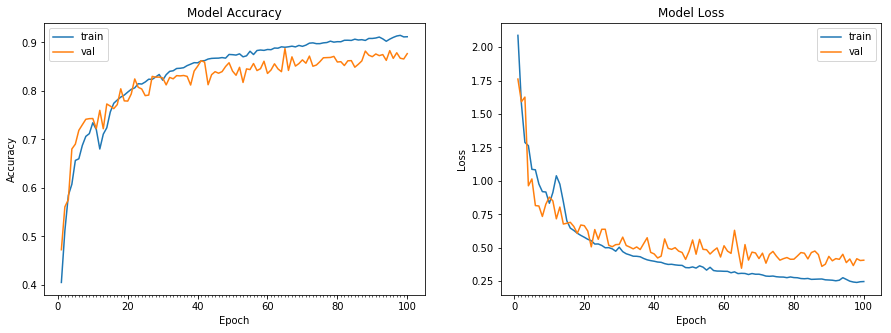

Accuracy on test data is: 37.88


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from random_eraser import get_random_eraser

checkpoint = ModelCheckpoint('modelBestCutout.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

datagen = ImageDataGenerator(zoom_range=0.1, 
                             horizontal_flip=True,
                            featurewise_center=True,
                            featurewise_std_normalization=True,
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))
datagen.fit(train_features)
testgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)
testgen.fit(test_features)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = testgen.flow(test_features, test_labels), validation_steps=100, verbose=1,
                                callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [2]:
from google.colab import files
files.upload()

Saving modelBestCutout.h5 to modelBestCutout.h5


## Find the trained model here https://github.com/Curiousss/EVA/blob/master/Assignment9/modelBestCutout.h5

In [0]:
from google.colab import files
files.download('modelBestCutout.h5')

### Load the best models with and without cutout sepatately

In [12]:
from keras.models import load_model
modelBestCutout = load_model("modelBestCutout.h5")

W0704 10:30:15.725007 139712857941888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 10:30:15.767766 139712857941888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 10:30:15.909301 139712857941888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 10:30:15.910301 139712857941888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0704 10:30:15.912338 139712857

In [0]:
from keras.models import load_model
modelBest = load_model("modelBest.h5")

In [0]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

### Run the prediction for the models with and without cutout separately

In [0]:
from keras.preprocessing.image import ImageDataGenerator

predgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)

predgen.fit(test_features)

pred_generator = predgen.flow(test_features, test_labels,
  shuffle=False)

y_pred = modelBest.predict_generator(pred_generator, steps=1) 

predgenCutout = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)

predgenCutout.fit(test_features)

pred_generatorCutout = predgenCutout.flow(test_features, test_labels,
  shuffle=False)

y_predCutout = modelBestCutout.predict_generator(pred_generatorCutout, steps=1) 

In [16]:
print("Index - Original - without cutout - withcutout")
for test_index in range(10):
  print(test_index, np.argmax(test_labels[test_index]), np.argmax(y_pred[test_index]), np.argmax(y_predCutout[test_index]))
  

Index - Original - without cutout - withcutout
0 3 3 3
1 8 8 8
2 8 8 8
3 0 0 0
4 6 6 6
5 6 6 6
6 1 1 1
7 6 6 6
8 3 3 3
9 1 1 1


## GRAD CAM Implementation
### The first 4 test images are used for using the grad cam GRADCam
### Each of the following steps is performs for each model(with and without cutout) separately for each of the 4 test images
#### Get the gradients
#### Create heatmaps
#### Print the original image, heatmap for the model without cutout and the heatmap for the model with cutout

0


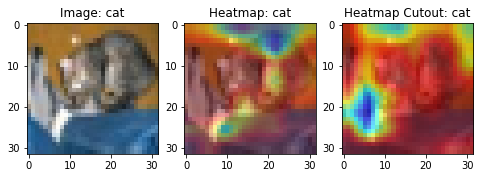

1


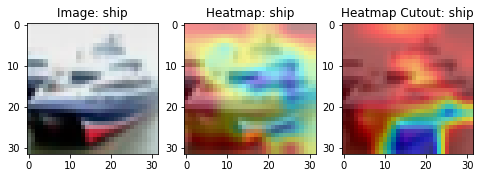

2


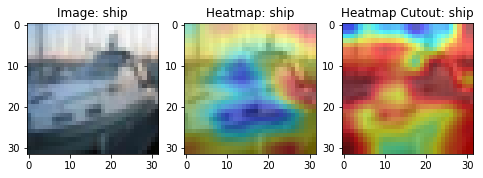

3


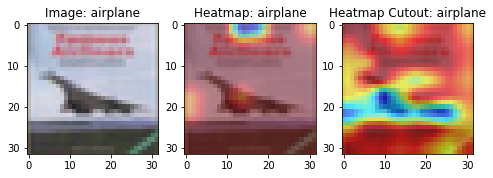

In [20]:
from google.colab.patches import cv2_imshow

superimposed_img = []
superimposed_imgCutout = []

# The first 4 test images are used for using the grad cam GRADCam
for test_idx in range(4):
  
  print(test_idx)
  test_class = np.argmax(test_labels[test_idx])
  #Get the original image
  img = test_features[test_idx]
  img = np.uint8(255 * img)

  # Get the layer information to be tested
  class_idx = np.argmax(y_pred[test_idx])
  class_output = modelBest.output[:, class_idx]
  last_conv_layer = modelBest.get_layer("activation_7")

  # Get the layer information with Cutout to be tested
  class_idxCutout = np.argmax(y_predCutout[test_idx])
  class_outputCutout = modelBestCutout.output[:, class_idx]
  last_conv_layerCutout = modelBestCutout.get_layer("activation_7")

  #Get the gradients
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([modelBest.input], [pooled_grads, last_conv_layer.output[0]])
  x = test_features[test_idx]
  x = np.expand_dims(x, axis=0)
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(256):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  #Get the gradients for Cutout
  gradsCutout = K.gradients(class_outputCutout, last_conv_layerCutout.output)[0]
  pooled_gradsCutout = K.mean(gradsCutout, axis=(0, 1, 2))
  iterateCutout = K.function([modelBestCutout.input], [pooled_gradsCutout, last_conv_layerCutout.output[0]])
  xCutout = test_features[test_idx]
  xCutout = np.expand_dims(xCutout, axis=0)
  pooled_grads_valueCutout, conv_layer_output_valueCutout = iterateCutout([xCutout])
  for i in range(256):
      conv_layer_output_valueCutout[:, :, i] *= pooled_grads_valueCutout[i]
  
  #Create heatmaps
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img.append(cv2.addWeighted(img, 0.6, heatmap, 0.4, 0))

  #Create heatmaps for Cutout
  
  heatmapCutout = np.mean(conv_layer_output_valueCutout, axis=-1)
  heatmapCutout = np.maximum(heatmapCutout, 0)
  heatmapCutout /= np.max(heatmapCutout)

  heatmapCutout = cv2.resize(heatmapCutout, (img.shape[1], img.shape[0]))
  heatmapCutout = np.uint8(255 * heatmapCutout)
  heatmapCutout = cv2.applyColorMap(heatmapCutout, cv2.COLORMAP_JET)
  superimposed_imgCutout.append(cv2.addWeighted(img, 0.4, heatmapCutout, 0.6, 0))

  
  #Print the original image, heatmap for the model without cutout and the heatmap for the model with cutout
  fig = plt.figure(figsize=(8,3))
  ax = fig.add_subplot(1, 3, 1)
  ax.set_title("Image: " + class_names[test_class])
  plt.imshow(img)
  
  ax = fig.add_subplot(1, 3, 2)
  ax.set_title("Heatmap: " + class_names[class_idx])
  plt.imshow(superimposed_img[test_idx])
  
  ax = fig.add_subplot(1, 3, 3)
  ax.set_title("Heatmap Cutout: " + class_names[class_idxCutout])
  plt.imshow(superimposed_imgCutout[test_idx])
  
  plt.show()
  
  